# Analyse Serum Ingredients
In total 400 serums analyed that were obtained from internet.

In [1]:
import pandas as pd

In [2]:
# Convert to dataframe
fileIn = 'face_serums_ingredients.json'
df = pd.read_json(fileIn).transpose().reset_index()
df.head()

,index,ingredients,price,loves-count,rating,reviews,bestselling
0,Hyaluronic Acid 2% + B5 Hydrating Serum,"[Vitamin B5, Next-generation Hyaluronic Acid C...",7.5,598048,4.2192,3453,0.99759
1,Watermelon Glow Niacinamide Dew Drops,"[Niacinamide, Watermelon, Hyaluronic Acid, Wat...",34.0,269119,4.4221,1772,0.995181
2,Dream Oasis Deep Hydration Serum,"[Glycerin, Hyaluronic Acid, Squalane, Colloida...",44.0,27686,4.8054,442,0.992771
3,Faded Serum for Dark Spots & Discoloration,"[Tranexamic Acid, Niacinamide, Azelaic Acid, W...",38.0,107579,3.7197,610,0.990361
4,Retinol Anti-Aging Serum,"[RetiStar Stabilised Retinol , Granactive Reti...",10.99,174160,4.4371,1073,0.987952


In [3]:
# Extended ingredients as new dataframe entries
dfe = df.explode('ingredients')
dfe.head()

,index,ingredients,price,loves-count,rating,reviews,bestselling
0,Hyaluronic Acid 2% + B5 Hydrating Serum,Vitamin B5,7.5,598048,4.2192,3453,0.99759
0,Hyaluronic Acid 2% + B5 Hydrating Serum,Next-generation Hyaluronic Acid Crosspolymer,7.5,598048,4.2192,3453,0.99759
0,Hyaluronic Acid 2% + B5 Hydrating Serum,Water/Aqua/Eau,7.5,598048,4.2192,3453,0.99759
0,Hyaluronic Acid 2% + B5 Hydrating Serum,Sodium Hyaluronate,7.5,598048,4.2192,3453,0.99759
0,Hyaluronic Acid 2% + B5 Hydrating Serum,Pentylene Glycol,7.5,598048,4.2192,3453,0.99759


In [4]:
# Get percentiles
per07, per08, per09 = df['rating'].quantile(q=[0.7, 0.8, 0.9])
# Get corresponding indexes
in07 = df[df['rating'] >= per07].index
in08 = df[df['rating'] >= per08].index
in09 = df[df['rating'] >= per09].index
# Extract all entries with individual ingredients
dfe07 = dfe.loc[in07]
dfe08 = dfe.loc[in08]
dfe09 = dfe.loc[in09]


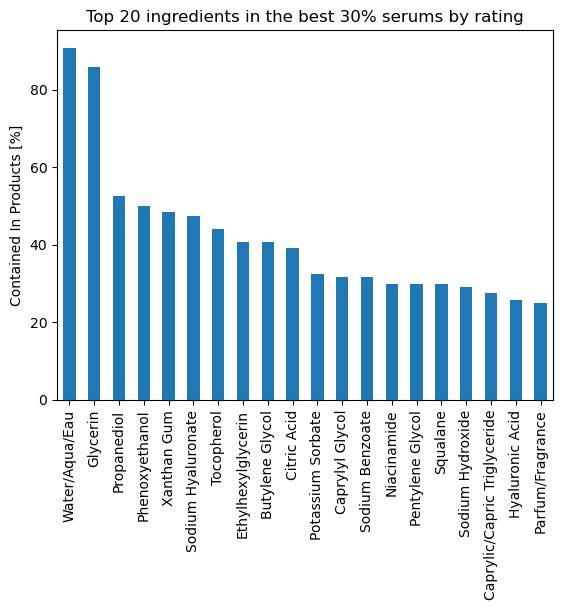

In [5]:
# Top 20 ingredients in the best 30% serums by rating
dfe07['ingredients'].value_counts()[0:20].apply(lambda x: 100*x/len(in07)).plot(
    kind='bar', ylabel='Contained In Products [%]',
    title='Top 20 ingredients in the best 30% serums by rating');

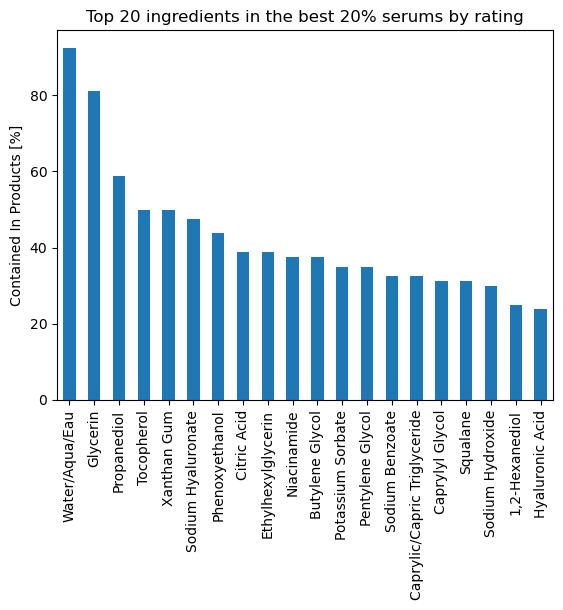

In [6]:
# Top 20 ingredients in the best 20% serums by rating
dfe08['ingredients'].value_counts()[0:20].apply(lambda x: 100*x/len(in08)).plot(
    kind='bar', ylabel='Contained In Products [%]',
    title='Top 20 ingredients in the best 20% serums by rating');

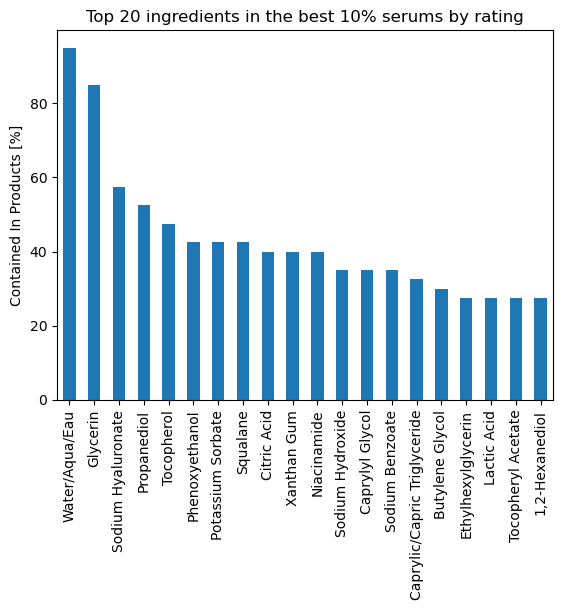

In [7]:
# Top 20 ingredients in the best 10% serums by rating
dfe09['ingredients'].value_counts()[0:20].apply(lambda x: 100*x/len(in09)).plot(
    kind='bar', ylabel='Contained In Products [%]',
    title='Top 20 ingredients in the best 10% serums by rating');

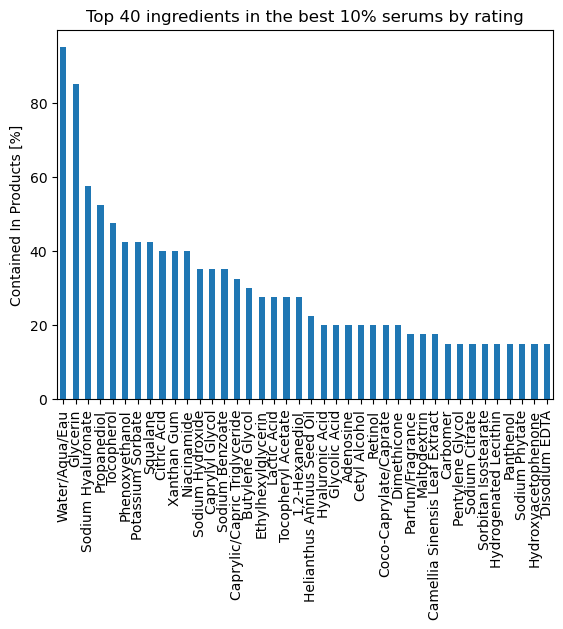

In [8]:
# Top 40 ingredients in the best 10% serums by rating
dfe09['ingredients'].value_counts()[0:40].apply(lambda x: 100*x/len(in09)).plot(
    kind='bar', ylabel='Contained In Products [%]',
    title='Top 40 ingredients in the best 10% serums by rating');

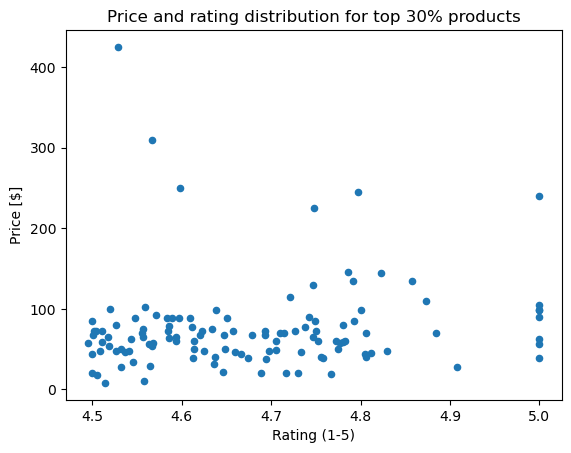

In [9]:
# Price and rating distribution for top 30% products
df.loc[in07].plot.scatter(
    x='rating', y='price', xlabel='Rating (1-5)', ylabel='Price [$]',
    title='Price and rating distribution for top 30% products');

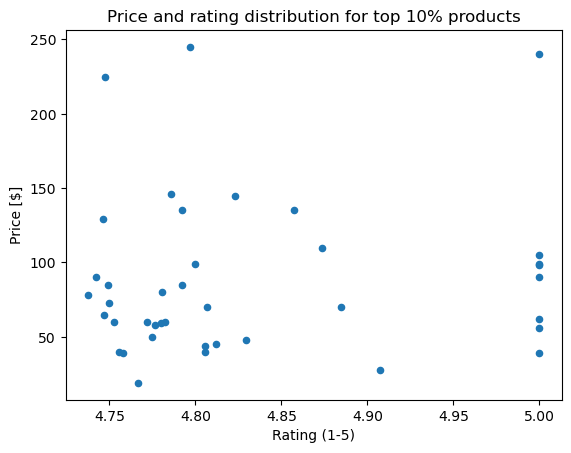

In [10]:
# Price and rating distribution for top 10% products
df.loc[in09].plot.scatter(
    x='rating', y='price', xlabel='Rating (1-5)', ylabel='Price [$]',
    title='Price and rating distribution for top 10% products');

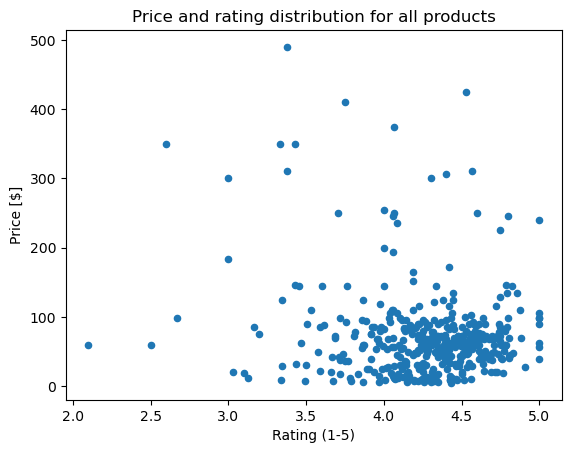

In [11]:
# Price and rating distribution for all products
df.plot.scatter(
    x='rating', y='price', xlabel='Rating (1-5)', ylabel='Price [$]',
    title='Price and rating distribution for all products');

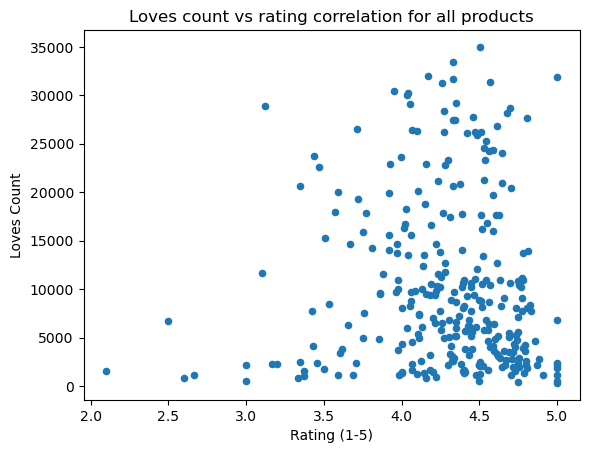

In [12]:
# Loves count vs rating correlation for all products
df[df['loves-count'] < 35000].plot.scatter(
    x='rating', y='loves-count', xlabel='Rating (1-5)', ylabel='Loves Count',
    title='Loves count vs rating correlation for all products');

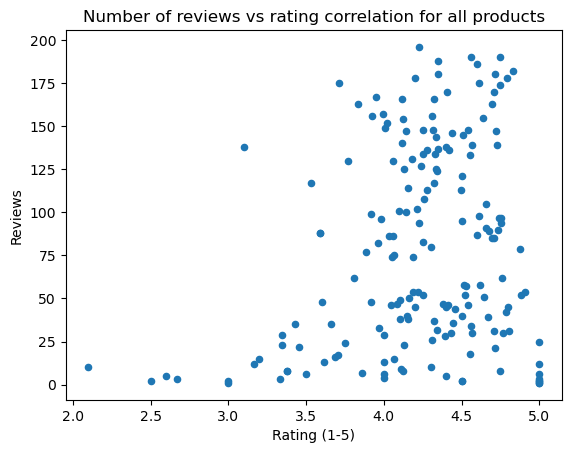

In [13]:
# Number of reviews vs rating correlation for all products
df[df['reviews'] < 200].plot.scatter(
    x='rating', y='reviews', xlabel='Rating (1-5)', ylabel='Reviews',
    title='Number of reviews vs rating correlation for all products');

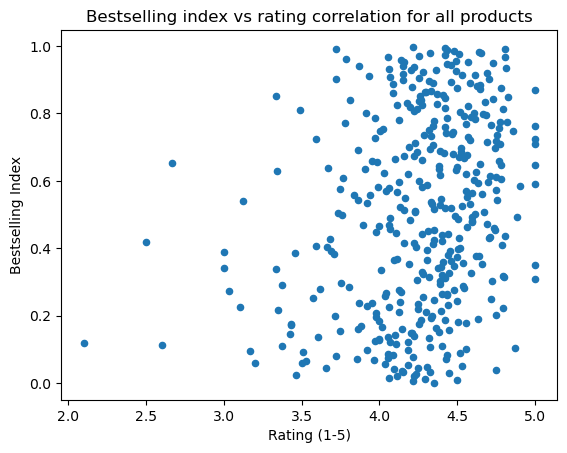

In [14]:
# Bestselling index vs rating correlation for all products
df.plot.scatter(
    x='rating', y='bestselling', xlabel='Rating (1-5)', ylabel='Bestselling Index',
    title='Bestselling index vs rating correlation for all products');